# Dataset (Toy simulation example)

**Note that the results may vary depending on the hardware used for execution (CPU, GPU, intel, AMD processor, etc).**

We will be creating a dataset for running the clinical transformer. 

* This dataset contains two populations with a high survival and low survival rate, respectively. We first generated the time and event table using an exponetial distribution. However, to accomodate for feature interactions, we used sklearn and generate a classification datasaet, then we replaced the time event on this new dataset. 
* 19,000 samples are used for pre-training. 
* 700 samples are used for training (30% for internal testing) and 300 as external validation.

In [1]:
import sys
sys.path.append('/root/capsule/environment/pysurvival/')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pysurvival.models.simulations import SimulationModel
from samecode.survival.plot import KMPlot

In [3]:
from samecode.random import set_seed
set_seed(0)

# Initializing the simulation model
pop1 = SimulationModel( survival_distribution = 'exponential',
                       risk_type = 'linear',
                       censored_parameter = 0.75,
                       alpha = .1,
                       beta = 0.1, )

# Generating N Random samples
N = 10000
dataset_1 = pop1.generate_data(
    num_samples = N, 
    num_features=2, 
    #feature_weights=[1.0, 0.9, 0.5, 0.3, 0]
)
dataset_1['pop'] = 0

2024-05-28 16:04:34.655738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 16:04:35.431686: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Number of data-points: 10000 - Number of events: 1979.0


In [29]:
from samecode.random import set_seed
set_seed(0)

# Initializing the simulation model
pop1 = SimulationModel( survival_distribution = 'exponential',
                       risk_type = 'linear',
                       censored_parameter = 0.75,
                       alpha = .005,
                       beta = 0.1, )

# Generating N Random samples
N = 10000
dataset_2 = pop1.generate_data(
    num_samples = N, 
    num_features=2, 
    #feature_weights=[1.0, 0.9, 0.5, 0.3, 0]
)
dataset_2['pop'] = 1

Number of data-points: 10000 - Number of events: 305.0


In [30]:
dataset= pd.concat([dataset_1, dataset_2]).reset_index(drop=True)
dataset = dataset.sample(frac=1, random_state=0)

In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [32]:
X, y = make_classification(
    random_state=42,
    n_samples=20000,
    n_informative=2,
    n_features=10,
    n_classes=2,
    n_redundant=2
)

In [33]:
X = pd.DataFrame(X, columns=['f_{}'.format(i) for i in range(10)])
X['label'] = y

In [34]:
data = pd.concat(
    [dataset.sort_values('pop').reset_index(drop=True), X.sort_values('label').reset_index(drop=True)],
    axis=1
)

In [35]:
data.head()

,x_1,x_2,time,event,pop,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,label
0,126.0,4.184024,0.000000,0.0,0,-0.254306,-0.643152,1.270347,0.299631,0.887750,-1.547413,-0.636007,-0.478558,-1.382835,-0.134281,0
1,129.0,2.831172,0.000000,0.0,0,-0.826152,-0.011951,-0.695811,-0.446786,0.545044,-2.515052,0.627135,-1.775731,-0.773618,-1.737644,0
2,123.0,8.990247,0.442287,1.0,0,1.240343,0.641476,-0.750861,-1.468183,-0.273907,0.931161,-0.757579,2.916353,-3.050031,0.638840,0
3,118.0,3.755718,0.000000,0.0,0,0.048646,-0.630173,-1.259445,-0.888262,-0.577935,-0.727735,-0.498878,0.181637,-1.251036,0.184228,0
4,122.0,0.541633,0.000000,0.0,0,-0.765166,1.472472,1.118912,-0.964222,1.696964,-1.171512,-0.118170,-1.746549,0.997636,-0.562098,0


In [36]:
X_pretrain, X_d  = train_test_split(
    data, test_size=0.05, random_state=0, stratify=data.label)

In [37]:
X_train, X_test  = train_test_split(
    X_d, test_size=0.3, random_state=0, stratify=X_d.label)

In [38]:
X_pretrain.shape, X_train.shape, X_test.shape

((19000, 16), (700, 16), (300, 16))

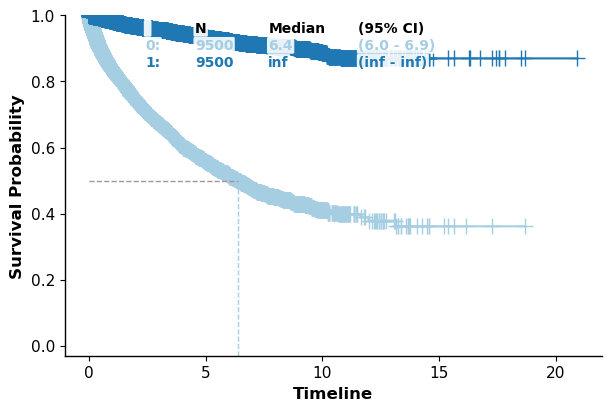

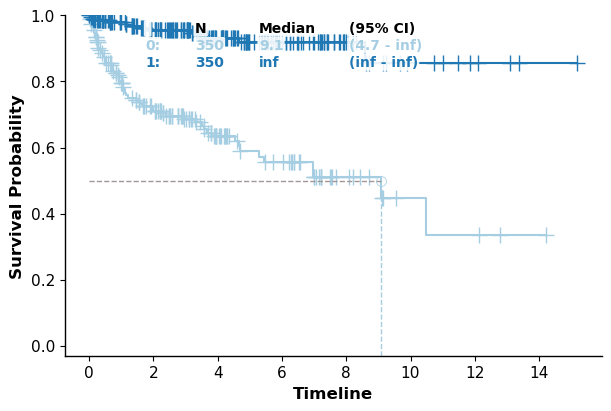

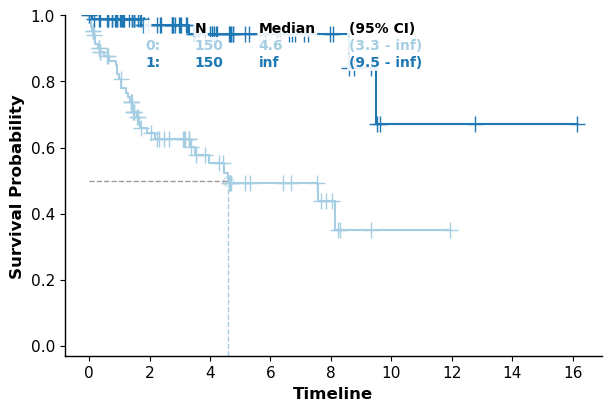

In [39]:
KMPlot(X_pretrain, time='time', event='event', label=['pop']).plot()
KMPlot(X_train, time='time', event='event', label=['pop']).plot()
KMPlot(X_test, time='time', event='event', label=['pop']).plot()

The dataset depicts two populations with distinct survival outcomes (long and short survivals)

In [40]:
X_pretrain.to_csv('../data/dataset-pretrain.data.csv', index=False)
X_train.to_csv('../data/dataset-train.data.csv', index=False)
X_test.to_csv('../data/dataset-test.data.csv', index=False)